<a href="https://colab.research.google.com/github/Harshjyot-Singh-Chawla/Exploratory-Data-Analysis-of-churn-dataset/blob/main/capstone_project_1_(telecom_churn)_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of churn dataset


# ***Problem Statement***

## **Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.**
## **Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.**

# ***Loading Data and Importing Modules***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

In [ ]:
# Reading the churn datset using pandas
churn_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone project 1/Copy of Telecom Churn.csv')

# ***Information  About The Data***

In [ ]:
# Display first 5 indexes of the dataset .
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Display last 5 indexes of the dataset .
churn_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
#shape of given dataframe 
#below given code returns a tuple representing the dimensionality of the DataFrame.
churn_df.shape

(3333, 20)

In [ ]:
# type of data in each column(in dataset) 
churn_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

State: States name(in code).

Account Length: period for which the Account is active. 

Area Code:  Area code having States

International Plan: Yes: Means International Plan is subscribed and ,No: Means the customer has not subscribed for international plan.

Voice Mail Plan: Yes: Voice Mail Plan is subscribed, No: voice mail Plan is not subscribed by the  customer

Number vmail messages: Number of Voice Mail Messages 

Total day minutes: Total Number of Minutes Spent in Morning

Total day calls: Total Number of Calls made in Morning.

Total day charge: Total Charge for all call made in Morning.

Total eve minutes: Total Number of Minutes Spent in Evening

Total eve calls: Total Number of Calls made  in Evening.

Total eve charge: Total Charge for all the call made in Evening.

Total night minutes: Total Number of Minutes Spent in the Night.

Total night calls: Total Number of Calls made in Night.

Total night charge: Total Charge for call made in Night.

Total intl minutes: Total Number of minutes spent in international calls.

Total intl calls: Total Number of call made internationally.

Total intl charge: Total charge for all the international call.

Customer service calls : Number of customer service calls made by customer

Churn Customer Churn, 
 True :churned customer
 False:means retained customer

In [ ]:
# Information about the telecom churn dataset  and its each column.
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# ***Checking for Missing And Duplicate values***

In [ ]:
''' To Checking the sum of Missing/null values,if present any we can replace or 
delete those null value'''
churn_df.isnull().sum()    

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## No missing value present.Hence, no need to do the missing value imputation

In [ ]:
# Descriptive Analysis of dataset 
churn_df.describe() 

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# ***Churn***

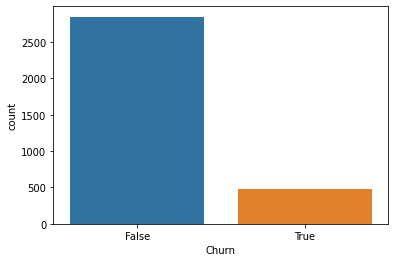

In [ ]:
# pictorial representation of churn column 
sns.countplot(x=churn_df.Churn)

([<matplotlib.patches.Wedge at 0x7f84d0adc950>,
 [Text(-1.9759205463225091, 0.9673355129532658, 'Not churned customer'),
  Text(2.155549637496287, -1.055275205948489, 'Churned customer')],
 [Text(-1.0777748434486412, 0.5276375525199631, '85.5%'),
  Text(1.2574039552061675, -0.6155772034699517, '14.5%')])

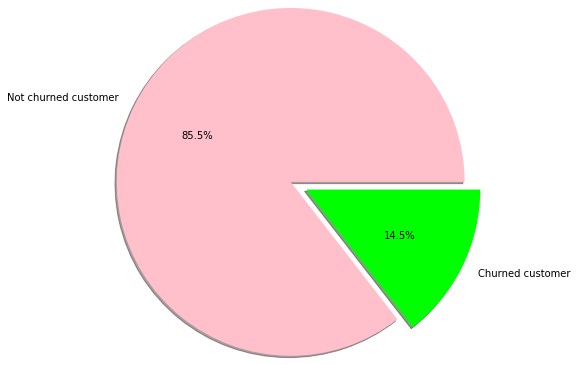

In [ ]:
# pie chart of churn column(in percentage) 
data = churn_df['Churn'].value_counts()
plt.pie(data, explode =(0, 0.2),autopct='%1.1f%%',shadow=True,radius = 2.0, 
        labels = ['Not churned customer','Churned customer'],
        colors=['pink' ,'lime'])


In [ ]:
churn_df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

 

# ***As we proceed further, lets see what find of correlation does other factors/column label/variable has with churn***

# ***States & Area code***

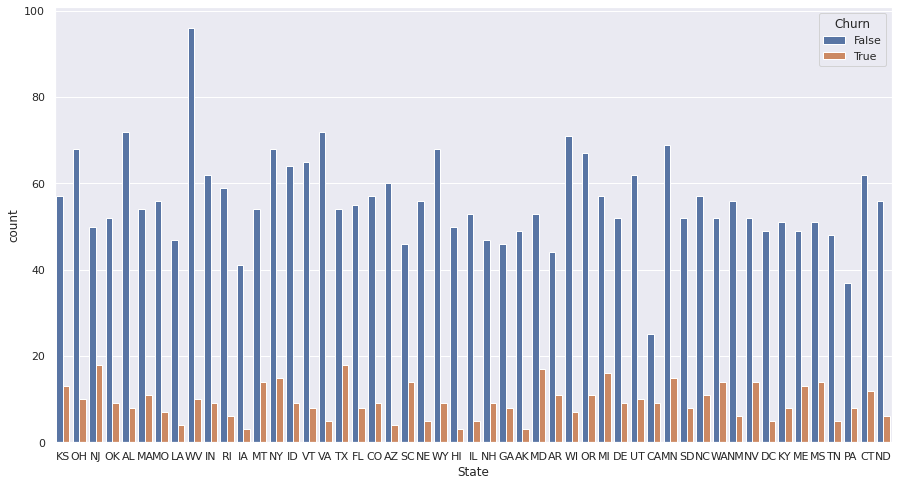

In [ ]:
# statewise data regarding the no. of churned and not churned customers
sns.set(style="darkgrid")                                                    
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=churn_df)
plt.show()

In [ ]:
# percentage of customer churned out of total customer statewise
State_data = pd.crosstab(churn_df["State"],churn_df["Churn"])
State_data['Churn_%'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),
                                         axis = 1)
print(State_data)

Churn  False  True    Churn_%
State                        
AK        49     3   5.769231
AL        72     8  10.000000
AR        44    11  20.000000
AZ        60     4   6.250000
CA        25     9  26.470588
CO        57     9  13.636364
CT        62    12  16.216216
DC        49     5   9.259259
DE        52     9  14.754098
FL        55     8  12.698413
GA        46     8  14.814815
HI        50     3   5.660377
IA        41     3   6.818182
ID        64     9  12.328767
IL        53     5   8.620690
IN        62     9  12.676056
KS        57    13  18.571429
KY        51     8  13.559322
LA        47     4   7.843137
MA        54    11  16.923077
MD        53    17  24.285714
ME        49    13  20.967742
MI        57    16  21.917808
MN        69    15  17.857143
MO        56     7  11.111111
MS        51    14  21.538462
MT        54    14  20.588235
NC        57    11  16.176471
ND        56     6   9.677419
NE        56     5   8.196721
NH        47     9  16.071429
NJ        

## From the above analysis( CA, NJ, TX, MD, SC, MI ) are the ones with churn rate of higher than 21.

## As we can see not all state have approximately same churn , thus package price(charges) cannnot be major factor . The reason for churn rate from a particular state may be due to the low coverage of the cellular network.

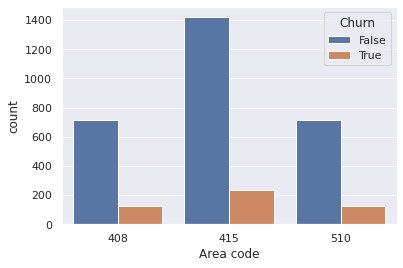

In [ ]:
# to find relation of churn areawise 
sns.set(style="darkgrid")
ax = sns.countplot(x='Area code', hue="Churn", data=churn_df)
plt.show()

### From the above plot it is quite clear that the churn rate is approximately same. therefore, it is hard to find relation between them.

# ***Account length***

In [ ]:
#creat two separate dataset for churned and not churned customer
cust_churn_df = churn_df[churn_df["Churn"] == bool(True)]
cust_not_churn_df = churn_df[churn_df["Churn"] == bool(False)]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


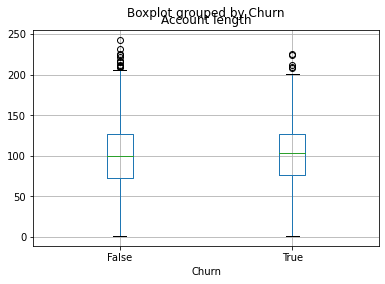

In [ ]:
# Box Plot for Account Length attribute 
churn_df.boxplot(column='Account length',by='Churn')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

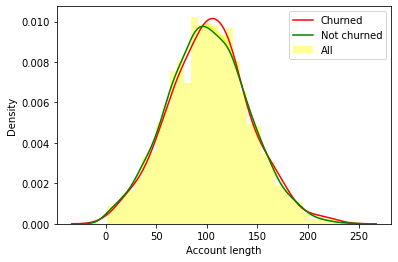

In [ ]:
#comparison of churned account length and not churned account length 
sns.distplot(churn_df['Account length'],color = 'yellow',label="All")
sns.distplot(cust_churn_df['Account length'],color = "red",hist=False,label="Churned")
sns.distplot(cust_not_churn_df['Account length'],color = 'green',hist= False,
             label="Not churned")
plt.legend()

### From above we can't find any relation between (churn) column and (account length) 

# ***International plan***

In [ ]:
# calculate count of customer with and without international plan
churn_df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

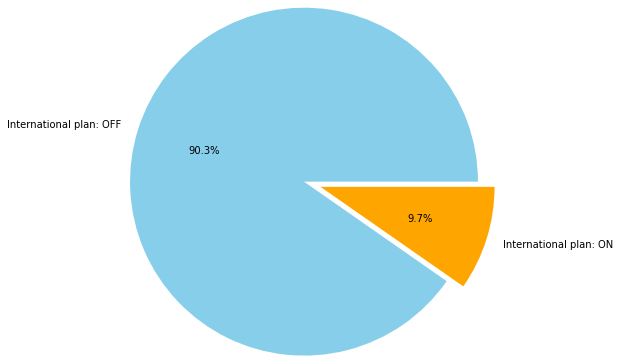

In [ ]:
# pie chart of percenteage of customer with international plan ON/OFF 
data = churn_df['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',radius = 2.0, 
        labels = ['International plan: OFF','International plan: ON'],
        colors=['skyblue' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')

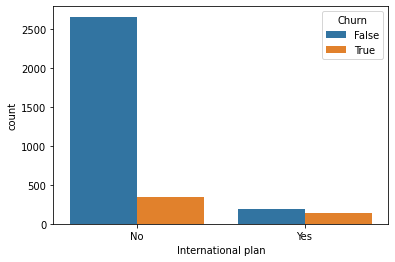

In [ ]:
#Analysing by using countplot
sns.countplot(x='International plan',hue="Churn",data = churn_df)

In [ ]:
# percentage of customer who churned with respect to total no of cusmtomers witn international plan ON & OFF
International_plan = pd.crosstab(churn_df["International plan"],churn_df["Churn"])
International_plan['Churn_%'] = International_plan.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan)

Churn               False  True    Churn_%
International plan                        
No                   2664   346  11.495017
Yes                   186   137  42.414861


## Above data shows us that out of customer with international plan 42.4% customer churn.This can due to high charges or connectivity issues, since cutomers already pay more tariff for interational calls compared to normal domestic call,if they have connectivity  issues customers are bound to be unsatisfied, which leads to churn. 